In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

In [47]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [48]:
male_images = '/Users/sankalpdeshmukh2820/Desktop/ML/Male Female Classifier/DataSet/Training/male'
female_images = '/Users/sankalpdeshmukh2820/Desktop/ML/Male Female Classifier/DataSet/Training/female'

In [49]:
males = os.listdir(male_images)
females = os.listdir(female_images)

In [50]:
print(len(males))
print(len(females))

23766
23243


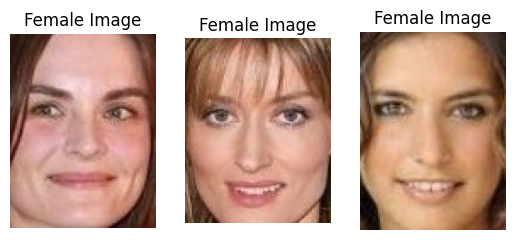

In [51]:
for i in range(3):  # Display the first 3 cat images
    female_im = Image.open(os.path.join(female_images, females[i+3]))
    plt.subplot(1, 3, i +1)
    plt.imshow(female_im)
    plt.axis('off')
    plt.title('Female Image')

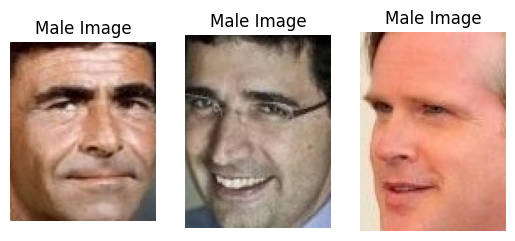

In [52]:
for i in range(3):  # Display the first 3 cat images
    male_im = Image.open(os.path.join(male_images, males[i+1]))
    plt.subplot(1, 3, i +1)
    plt.imshow(male_im)
    plt.axis('off')
    plt.title('Male Image')

In [53]:
import cv2

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [55]:
train_datagen = ImageDataGenerator(
    rescale=1./255,     # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split data into training and validation sets
)

train_generator = train_datagen.flow_from_directory(
    '/Users/sankalpdeshmukh2820/Desktop/ML/Male Female Classifier/DataSet/Training',           # Path to the dataset directory
    target_size=(64, 64), # Resize images to 64x64 pixels
    batch_size=128,
    class_mode='binary',  # Change to 'binary' for binary classification
    subset='training'     # Use the training split
)

validation_generator = train_datagen.flow_from_directory(
    '/Users/sankalpdeshmukh2820/Desktop/ML/Male Female Classifier/DataSet/Training',
    target_size=(64, 64),
    batch_size=128,
    class_mode='binary',
    subset='validation'  # Use the validation split
)
class_labels_train = train_generator.class_indices
class_labels_val = validation_generator.class_indices

# Print the class labels and their indices
print(class_labels_train.values())
print(class_labels_val.values())

Found 37608 images belonging to 2 classes.
Found 9401 images belonging to 2 classes.
dict_values([0, 1])
dict_values([0, 1])


In [56]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  


In [57]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [58]:
history = model.fit(train_generator,epochs=2,validation_data=validation_generator)

Epoch 1/2
  8/294 [..............................] - ETA: 4:38 - loss: 0.7473 - accuracy: 0.5459

KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model.evaluate(validation_generator)

74/74 [==============================] - 16s 221ms/step - loss: 0.1746 - accuracy: 0.9336


In [98]:
model.save('myModel.h5')

In [99]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('myModel.h5')


In [100]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

1/1 [==============================] - 0s 132ms/step
Female Detected
24.924446642398834%


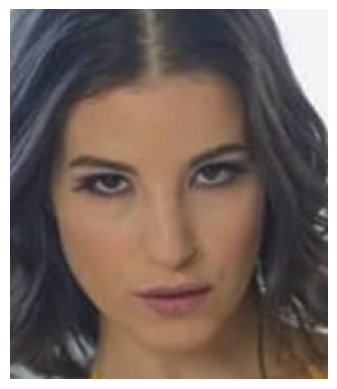

In [103]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess your new image(s)
def predictor(image_path):
    path = image_path
    img = load_img(path, target_size=(64, 64))
    img = img_to_array(img)
    img = img.reshape((1, 64, 64, 3))  # Reshape for batch size of 1
    img = img / 255.0  # Normalize pixel values to [0, 1]

    # Make a prediction
    prediction = model.predict(img)
    if prediction>=0.5:
        print('Male Detected')
    else :
        print('Female Detected')    
    print(f"{prediction[0][0]*100}%")
    return img
    

image_path = '/Users/sankalpdeshmukh2820/Desktop/ML/Male Female Classifier/sampleimg1.jpg'
predictor(image_path)
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  
plt.show()



